# 9장 오차 역전파에서 딥러닝으로

## 1. 딥러닝의 태동, 오차 역전파

- 경사 하강법은 임의의 가중치를 선언하고 오차를 구한 후 이 오차가 최소인 지점으로 조금씩 이동
    - 오차가 최소인 지점은 미분했을 때 기울기가 0이 되는 지점
    - 경사 하강법은 단일 퍼셉트론에서만 가능
    - 다층 퍼셉트론은 n번의 경사 하강법 적용 필요
- 오차 역전파
    1. 입력층에서 출력층까지 순전파 진행
        - 현재의 가중치로 만들어진 예측 값과 실제 값을 비교하여 오차 계산
    2. 출력층에서 은닉층까지 역전파 진행
        - 출력층의 오차를 사용해 출력층 가중치 수정
    3. 은닉층에서 입력층까지 역전파 진행
        - 은닉층의 오차를 구할 수 없으므로 출력층의 오차를 사용해 은닉층의 가중치 수정

## 2. 활성화 함수와 고급 경사 하강법

- 활성화 함수가 시그모이드 함수일 경우 역전파를 진행할수록 점점 기울기가 소실
    - 시그모이드 함수 $f(x) = \frac{1}{1 + e^{-x}}$
    - 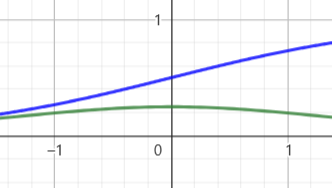
        - 파란색: 함수값, 초록색: 미분값
    - 시그모이드 함수 미분의 최대치는 0.25이므로 계속 곱하다 보면 0에 가까워짐
    - 여러 층을 거칠수록 기울기가 사라져 가중치 수정이 어려움
- 이를 해결하고자 렐루(ReLU) 활성화 함수 제안
    - 렐루 함수 $f(x) = \begin{Bmatrix} x\,(x > 0) \\ 0\,(x \leq 0) \end{Bmatrix}$
    - 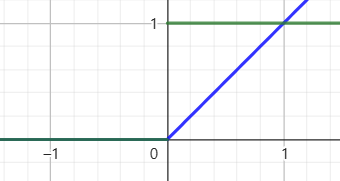
    - $x$가 0보다 크면 미분 값은 1로 여러 번 오차 역전파가 진행되어도 값이 남아있음
- 이외의 활성화 함수
    - 하이퍼볼릭 탄젠트(hyperbolic tangent) 함수 $f(x) = \tanh(x)$
    - 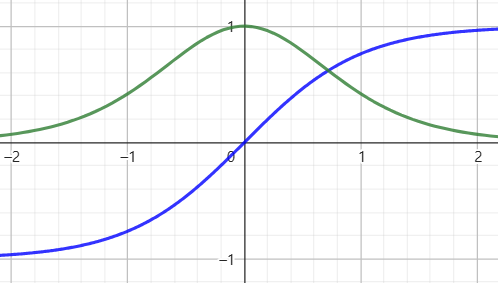
    - 소프트플러스(softplus) 함수 $f(x) = \log(1 + e^x)$
    - 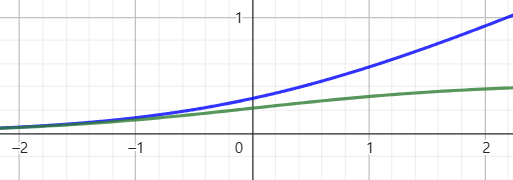


## 3. 속도와 정확도 문제를 해결하는 고급 경사 하강법

- 현재는 정확도와 속도를 모두 향상시킨 아담(adam)이 가장 많이 사용
    - 확률적 경사 하강법(Stochastic Gradient Descent, SGD)
        - 랜덤하게 추출한 일부 데이터를 사용해 빨리 더 자주 업데이트
    - 모멘텀(momentum)
        - SGD에 방향 조절 개념 추가
        - 관성의 방향을 고려해 진동과 폭을 줄이는 효과
    - 네스테로프 모멘텀(NAG)
        - 모멘텀이 이동시킬 방향으로 미리 이동해 불필요한 이동을 줄이는 효과
    - 아다그라드(adagrad)
        - SGD에 보폭 조절 개념 추가
        - 변수의 업데이트가 잦으면 학습률을 적게 하여 이동 보폭을 조절
    - 알엠에스프롭(RMSProp)
        - 아다그라드의 보폭 민감도를 보완
    - 아담(adam)
        - 모멘텀과 알엠에스프롭을 합친 방법